In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("mnist_train.csv",header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(60000, 785)

In [10]:
img=df.iloc[0,1:].values

In [11]:
img.size

784

In [12]:
pic=img.reshape(28,28)

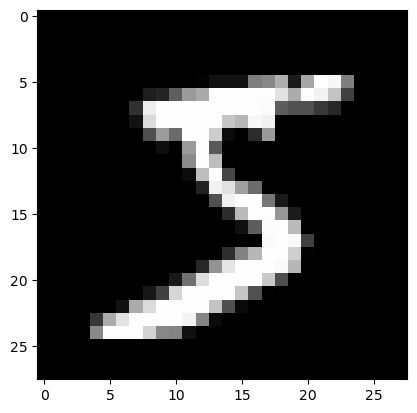

In [15]:
from matplotlib import pyplot as plt
plt.imshow(pic)
plt.gray()
plt.show()

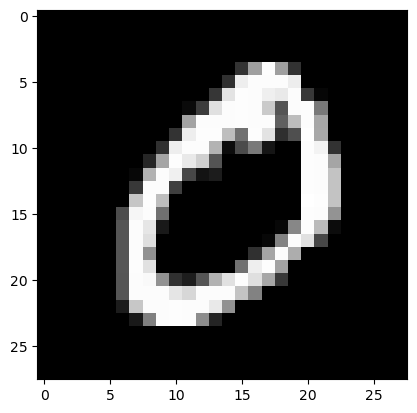

In [17]:
img=df.iloc[1,1:].values
pic=img.reshape(28,28)
plt.imshow(pic)
plt.gray()
plt.show()

In [18]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [19]:
x.shape

(60000, 784)

In [20]:
y.shape

(60000,)

In [21]:
# scale features

In [22]:
x=x/255  #short cut for normalization

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKerasTF

In [24]:
y_encoded=to_categorical(y)

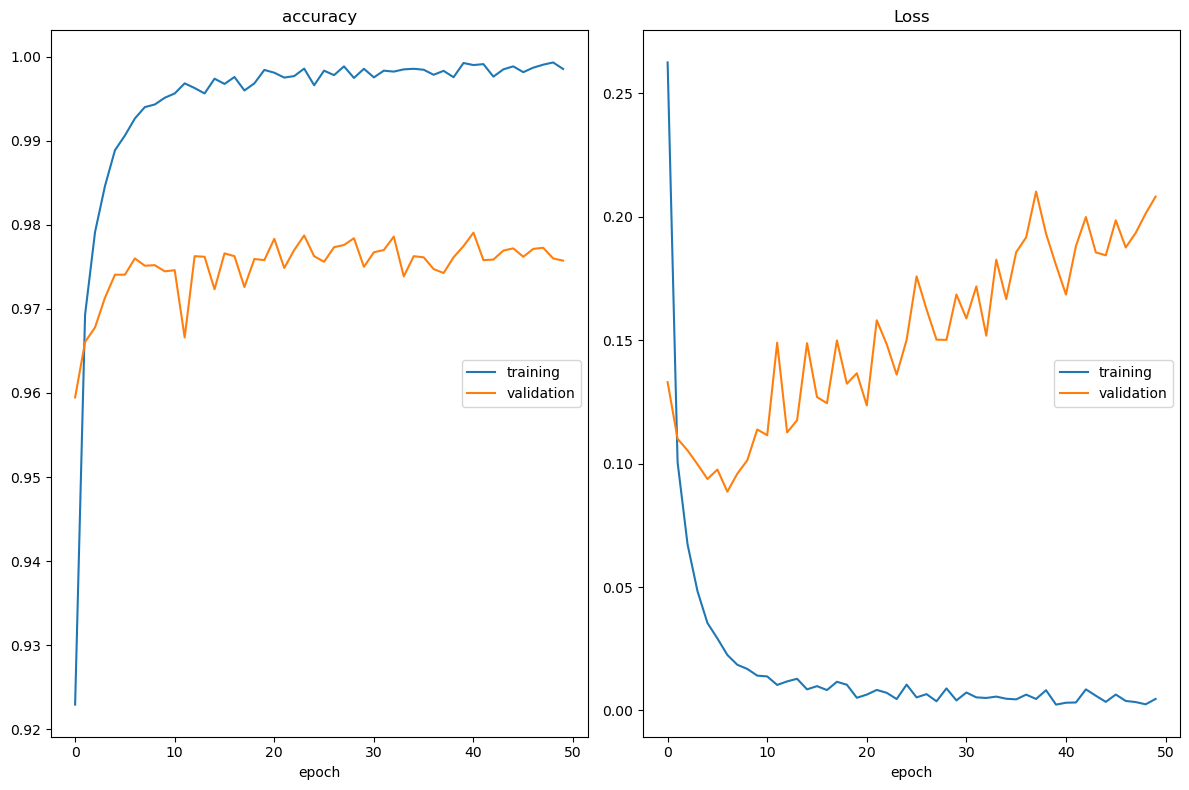

accuracy
	training         	 (min:    0.923, max:    0.999, cur:    0.999)
	validation       	 (min:    0.959, max:    0.979, cur:    0.976)
Loss
	training         	 (min:    0.002, max:    0.263, cur:    0.005)
	validation       	 (min:    0.089, max:    0.210, cur:    0.208)
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9757 - val_loss: 0.2082


In [27]:
mnist_model=Sequential()
mnist_model.add(Input(shape=(784,)))
mnist_model.add(Dense(256,activation='relu'))
mnist_model.add(Dense(128,activation='relu'))
mnist_model.add(Dense(10,activation='softmax'))
mnist_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mnist_model.fit(x,y_encoded,epochs=50,batch_size=64,validation_split=0.25,callbacks=[PlotLossesKerasTF()])

In [28]:
from sklearn.metrics import classification_report

In [29]:
mnist_model.predict(x)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


array([[4.52508255e-32, 9.93158146e-23, 4.52898977e-30, ...,
        1.48491633e-33, 2.18775723e-28, 5.08755053e-17],
       [1.00000000e+00, 0.00000000e+00, 7.60777583e-23, ...,
        9.50850331e-29, 1.34279661e-37, 5.48404144e-32],
       [2.20022315e-23, 1.05466520e-14, 1.50217885e-17, ...,
        1.67966832e-16, 1.09354766e-13, 5.26963109e-12],
       ...,
       [0.00000000e+00, 5.14176290e-34, 0.00000000e+00, ...,
        0.00000000e+00, 2.23496967e-27, 6.20329253e-24],
       [1.93174076e-13, 5.49773724e-18, 8.94539891e-15, ...,
        4.54170371e-22, 2.50003950e-21, 4.39748650e-23],
       [4.54997805e-21, 1.76022459e-22, 1.53537526e-17, ...,
        2.05188228e-23, 1.00000000e+00, 3.35684286e-18]], dtype=float32)

In [30]:
y_pred=mnist_model.predict(x).argmax(axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [31]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       1.00      0.99      1.00      6742
           2       0.99      0.99      0.99      5958
           3       0.99      1.00      0.99      6131
           4       1.00      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [32]:
testData=pd.read_csv("mnist_test.csv",header=None)

In [33]:
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
xtest=testData.iloc[:,1:]
ytest=testData.iloc[:,0]

In [35]:
xtest=xtest/255
ytest_pred=mnist_model.predict(xtest).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.96      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from tensorflow.keras.models import load_model

mnist_model1 = load_model("digitclassify.h5")

y_test_pred=mnist_model1.predict(x_test).argmax(axis=1)

print(classification_report(y_test,y_test_pred))